<a href="https://colab.research.google.com/github/Debraj2112/Capstone_Project---Hotel_Booking_Analysis/blob/main/Exploratory_Data_Ananlysis_on_Hotel_Booking_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [5]:
#reading data

hotel_bookings_df = pd.read_csv('/content/Hotel Bookings (1).csv')
hotel_bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# DATA_CLEANING

In [6]:
hotel_bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# checking for null values

null = pd.DataFrame({'Null Values' : hotel_bookings_df.isna().sum(), 'Percentage Null Values' : (hotel_bookings_df.isna().sum()) / (hotel_bookings_df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [10]:
# filling null values with zero

hotel_bookings_df.fillna(0, inplace = True)

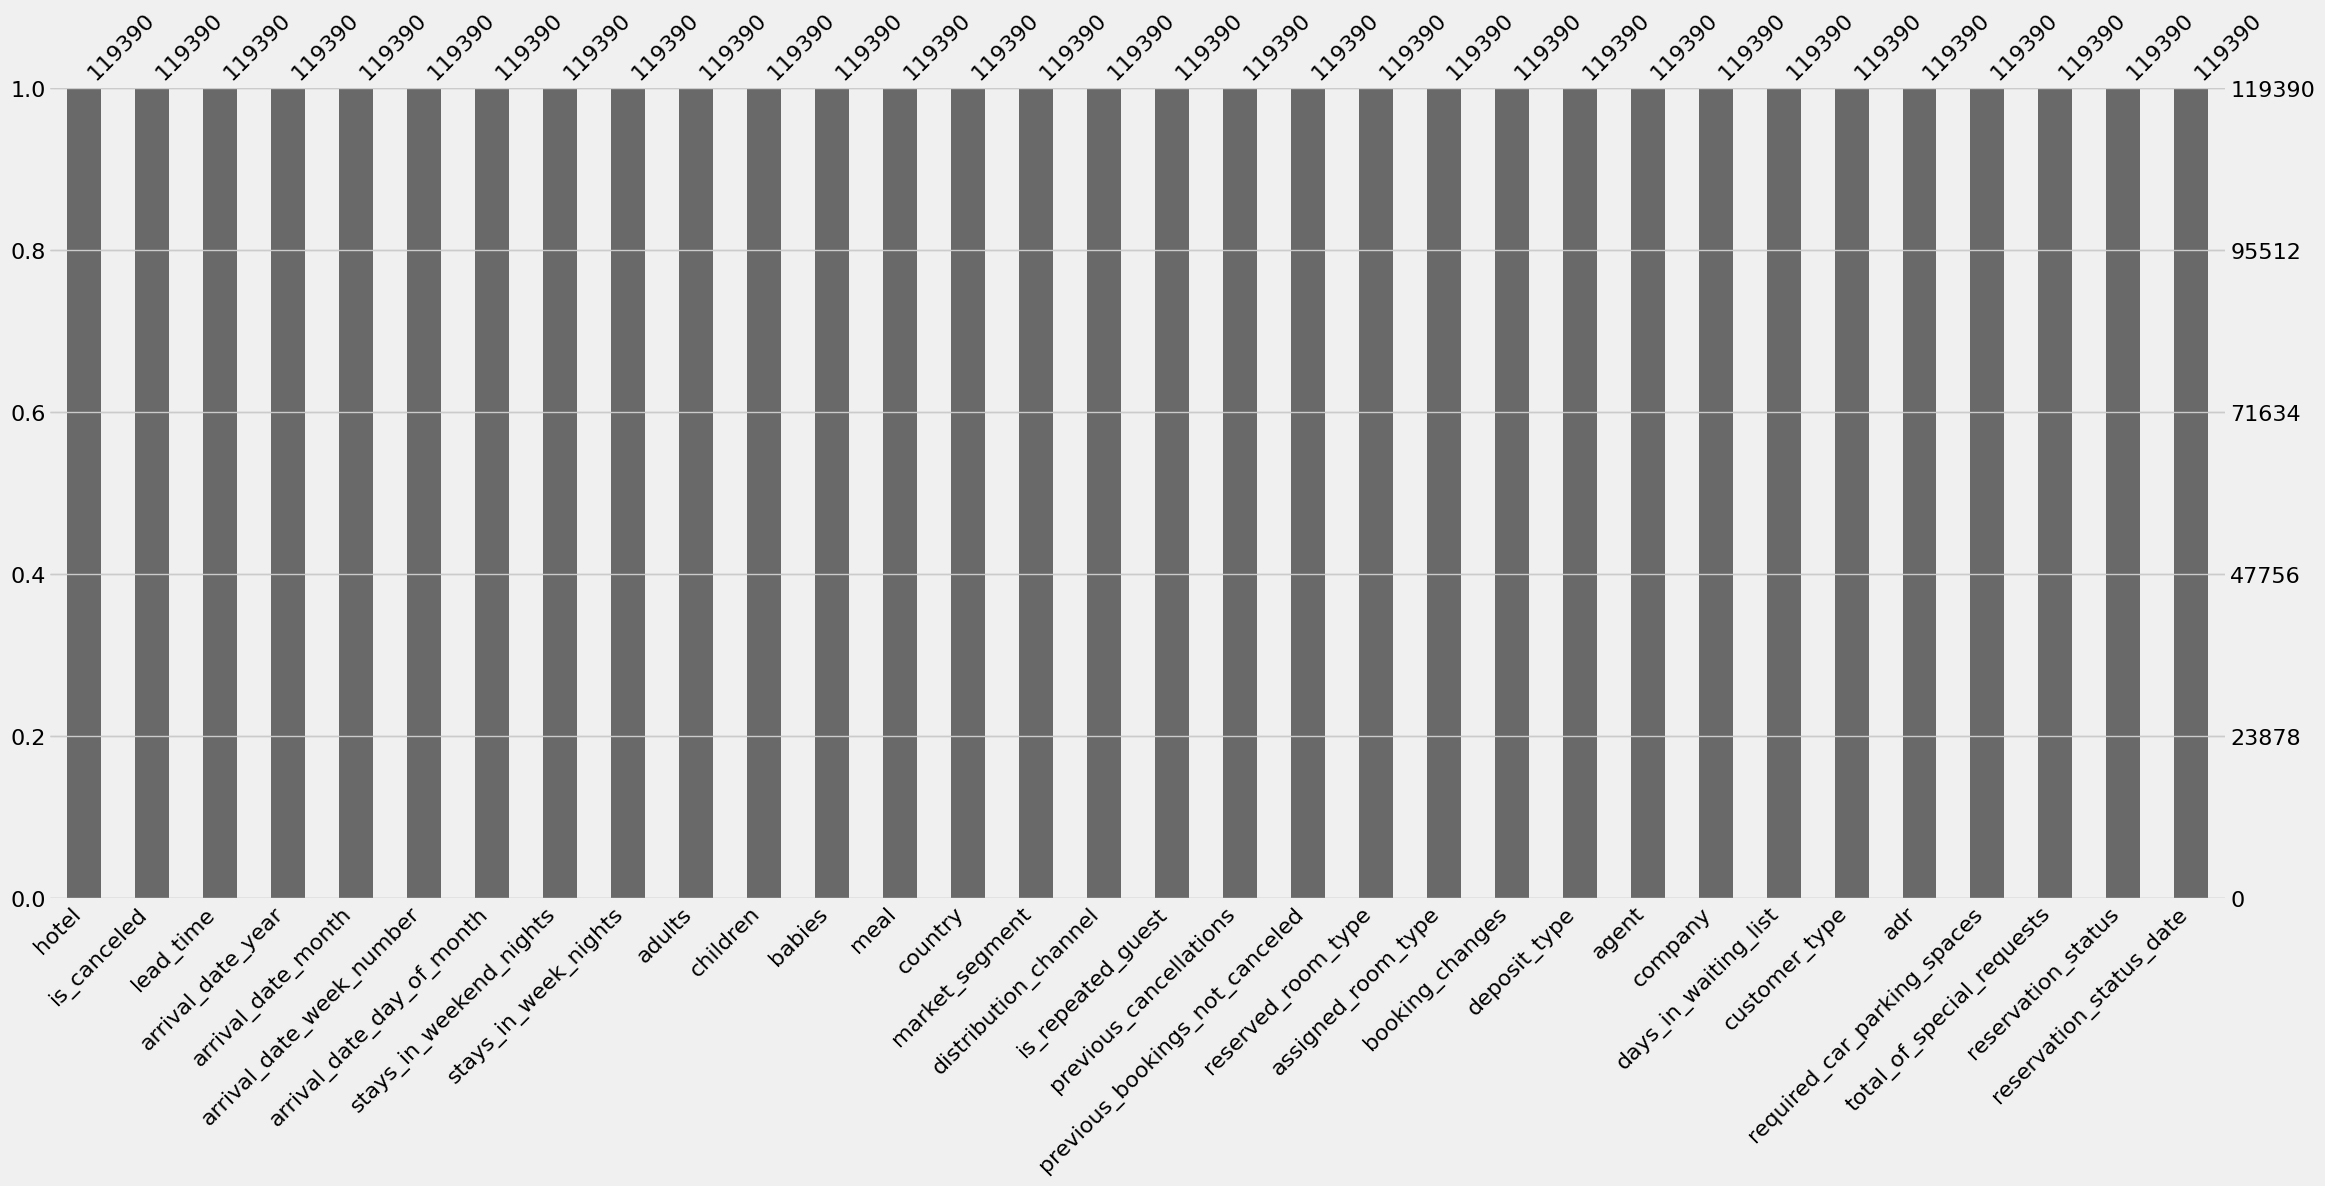

In [11]:
# visualizing null values
msno.bar(hotel_bookings_df)
plt.show()

In [ ]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (hotel_bookings_df.children == 0) & (hotel_bookings_df.adults == 0) & (hotel_bookings_df.babies == 0)
hotel_bookings_df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
hotel_bookings_df = hotel_bookings_df[~filter]
hotel_bookings_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# EXPLORATORY_DATA_ANALYSIS

### DISTRIBUTION OF NUMBER OF VISITORS FROM DIFFERENT COUNTRIES

In [ ]:
countries_df = hotel_bookings_df[hotel_bookings_df['is_canceled'] == 0]['country'].value_counts().reset_index()
countries_df.columns = ['country', 'No of guests']
countries_df

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(countries_df, locations = countries_df['country'],
                           color = countries_df['No of guests'], hover_name = countries_df['country'])
guests_map.show()

so although guests are coming from all over the world, majority of guests are coming from Europe and specifically from country of PORTUGAL

### PRICE_PER_NIGHT

In [12]:
hotel_bookings_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
hotel_bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
data = hotel_bookings_df[hotel_bookings_df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

Based on the different room types, meal plans opted for along with many seasonal factors,the price varies a lot.The above box plot shows the average price of each room depends on the category of rooms.

### VARIATION OF PRICE OVER THE YEAR

In [15]:
data_resort = hotel_bookings_df[(hotel_bookings_df['hotel'] == 'Resort Hotel') & (hotel_bookings_df['is_canceled'] == 0)]
data_city = hotel_bookings_df[(hotel_bookings_df['hotel'] == 'City Hotel') & (hotel_bookings_df['is_canceled'] == 0)]

In [16]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [17]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [19]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort_hotel', 'price_for_city_hotel']
final_hotel

,month,price_for_resort_hotel,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


here we see that months are not in order which will result in improper visualization.So for proper visualization we first have to sort the dataframe by the order of the correct month

In [20]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=626733a2d5a72bd4c79d2cc0e7a1bba2331cb9ff19f80bd886bab6ebc77bb49d
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3224 sha256=f3697b00f6bde08cce9b7921519270660ade1364b3f30fd99c6c3da5595b0309
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [21]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [22]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [24]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort_hotel','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

This plot clearly demonstrates that rates at resort hotels are significantly higher in the summer than at city hotels, which have lower price fluctuations and the highest rates in the spring and fall.


### VARIATION OF NUMBER OF GUESTS OVER THE MONTHS

In [25]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [26]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [27]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort hotel','no of guest in city hotel']
final_guests

,month,no of guests in resort hotel,no of guest in city hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [28]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort hotel,no of guest in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [29]:
px.line(final_guests, x = 'month', y = ['no of guests in resort hotel','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

*   Spring and fall are the busiest seasons for the City hotel, and these seasons also have the highest rates. Prices are lower, but there are less visitors in July and August.
*  From June to September, when rates are at their greatest, there is a minor decrease in the number of guests staying at the Resort hotel. Winter is the season with the fewest visitors to both hotels.

### DURATION OF STAYS AT THE HOTELS

In [30]:
filter = hotel_bookings_df['is_canceled'] == 0
data = hotel_bookings_df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [31]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

<ipython-input-31-a6d36badedd5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [32]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [33]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')